In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import animation

from numpy import sin, cos, tan, pi

In [2]:
clr1 = 'dimgray'
params={
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top' : False,
    'axes.spines.bottom' : False,
    'axes.labelcolor' : clr1,
    'axes.labelsize': 'medium',
    'axes.titlecolor': clr1,
    'xtick.color' : clr1,
    'ytick.color' : clr1,
    'lines.linewidth' : 2,
    'font.size' : 20, 
    'legend.framealpha': 0.5,
    'text.color' : clr1}

for (k,v) in params.items():
    mpl.rcParams[k] = v

plt.style.use('fast')#'seaborn-bright')

CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

color_list = [CB91_Blue, CB91_Amber, CB91_Pink, CB91_Green,
              CB91_Purple, CB91_Violet]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

In [ ]:
factor = pi/180
angs=np.array([0, 30, 45, 60, 90, 120, 150, 180])

cs = cos(angs*factor)
sn = sin(angs*factor)

df=pd.DataFrame()
df["angle"] = angs
df["Sin"] = np.round(sn, 2)
df["Cos"] = np.round(cs, 2)
df

In [ ]:
def plot_poligon(n=3):
    # compute teh vortex angles
    theta = [ i*factor * 360/n  for i in range(n) ]
    # append the first point to the last for a complete n gone
    theta.append(theta[0])    
    css = cos(theta)
    snn = sin(theta)

    fig, ax = plt.subplots(1,1, figsize=(5,5))

    ax.plot(css, snn)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)

    return ax
    #return [css, snn]
    
    

In [ ]:
n=8
npts=10

total_pts = n*npts - n

fig, ax = plt.subplots(1,1, figsize=(7,7))

ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_xticks([])
ax.set_yticks([]);


xx=[]
yy=[]
for i in range(n):
    
    theta_i1 =  i*factor * 360/n 
    theta_i2 =  ((i+1)%n)*factor * 360/n 
    
    css1 = cos(theta_i1)
    snn1 = sin(theta_i1)
    css2 = cos(theta_i2)
    snn2 = sin(theta_i2)

    p0 = (css1, snn1)
    p1 = (css2, snn2)

    xi = np.linspace(p0[0], p1[0], npts)
    yi = np.linspace(p0[1], p1[1], npts)
    
    # avoid the duplicates by removing the last point from the list
    xx = xx[:-1]+list(xi)
    yy = yy[:-1]+list(yi)


ax.plot(xx, yy, "-o", color="blue")
ax.scatter([0],[0], color='violet')


# for j in range(len(xx)):
#     ax.text(xx[j], yy[j], str(j))

pp=116

for j in range(len(xx)):
    xx0 = [xx[j], xx[(j+pp)%total_pts] ]
    yy0 = [yy[j], yy[(j+pp)%total_pts] ]
    ax.plot(xx0, yy0, color="k")

In [ ]:
len(xx), len(yy)

In [ ]:
def plott(n=3, npts=4):

    fig, ax = plt.subplots(1,1, figsize=(7,7))

    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.set_xticks([])
    ax.set_yticks([]);


    xx=[]
    yy=[]
    for i in range(n):

        theta_i1 =  i*factor * 360/n 
        theta_i2 =  ((i+1)%n)*factor * 360/n 

        css1 = cos(theta_i1)
        snn1 = sin(theta_i1)
        css2 = cos(theta_i2)
        snn2 = sin(theta_i2)

        p0 = (css1, snn1)
        p1 = (css2, snn2)

        xi = np.linspace(p0[0], p1[0], npts)
        yi = np.linspace(p0[1], p1[1], npts)

        xx = xx+list(xi)
        yy = yy+list(yi)

    ax.plot(xx, yy, "-o", color="blue")
    ax.scatter([0],[0], color='violet')


In [ ]:
n=4
plott(n=n, npts=4)

## Animation

In [ ]:
def animation_():    
    fig, ax = plt.subplots(figsize=(7, 7))

    def update(ii):
        n=ii+2; npts=4
        ax.clear()
        #fig, ax = plt.subplots(1,1, figsize=(7,7))
        ax.set_xlim(-1.2, 1.2)
        ax.set_ylim(-1.2, 1.2)
        ax.set_xticks([])
        ax.set_yticks([]);
        xx=[]; yy=[]
        for i in range(n):

            theta_i1 =  i*factor * 360/n 
            theta_i2 =  ((i+1)%n)*factor * 360/n 

            css1 = cos(theta_i1)
            snn1 = sin(theta_i1)
            css2 = cos(theta_i2)
            snn2 = sin(theta_i2)

            p0 = (css1, snn1); p1 = (css2, snn2)

            xi = np.linspace(p0[0], p1[0], npts)
            yi = np.linspace(p0[1], p1[1], npts)

            xx = xx+list(xi)
            yy = yy+list(yi)

        ax.plot(xx, yy, "-o")#, color="blue")
        ax.scatter([0],[0], color='violet')
        ax.set_title(f"{n}-gon", fontsize=24)

    savename="animation_tmp.mp4"
    anim = animation.FuncAnimation(fig, update, interval=20, frames=30)
    anim.save(savename, writer=animation.FFMpegWriter(fps=4))
    
animation_()

In [14]:
factor = pi/180
def animation_2(n=8):    
    fig, ax = plt.subplots(figsize=(7, 7))
    # number of points in each line segments
    npts=10
    
    def update(ii):
        mod=ii+1;
        ax.clear()
        # total number of points in the n-gon
        total_pts = n*npts - n

        ax.set_xlim(-1.2, 1.2); ax.set_ylim(-1.2, 1.2)
        ax.set_xticks([]); ax.set_yticks([]);

        xx=[]; yy=[]
        for i in range(n):

            theta_i1 =  i*factor * 360/n 
            theta_i2 =  ((i+1)%n)*factor * 360/n 

            css1, snn1 = cos(theta_i1), sin(theta_i1)
            css2, snn2 = cos(theta_i2), sin(theta_i2)

            p0 = (css1, snn1)
            p1 = (css2, snn2)

            xi = np.linspace(p0[0], p1[0], npts)
            yi = np.linspace(p0[1], p1[1], npts)

            # avoid the duplicates by removing the last point from the list
            xx = xx[:-1]+list(xi)
            yy = yy[:-1]+list(yi)

        # plot the n-gon with points
        ax.plot(xx, yy, "-o", color="blue")
        # plot the origin
        ax.scatter([0],[0], color='violet')
        
        # plot the internal lines
        for j in range(len(xx)):
            xx0 = [xx[j], xx[(j+mod)%total_pts] ]
            yy0 = [yy[j], yy[(j+mod)%total_pts] ]
            ax.plot(xx0, yy0)#, color="pink")

    savename="animation_n_"+str(n)+"_color.mp4"
    anim = animation.FuncAnimation(fig, update, interval=1, frames= n*(npts-1))
    anim.save(savename, writer=animation.FFMpegWriter(fps=10))

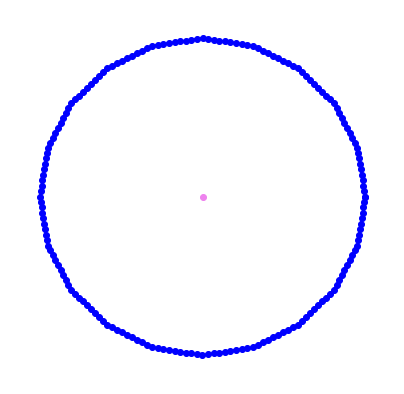

In [17]:
animation_2(20)